In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from PIL import Image
import tensorflow as tf
import os
import glob
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
def isValidImage(path):
    try:
        with Image.open(path) as img:
            return True
    except:
        return False

In [3]:
label = []
image_data = []
for class_name in os.listdir("images"):
    for subclass_name in os.listdir("images/"+class_name):
        if(isValidImage("images/"+class_name+"/"+subclass_name)):
            if "fresh" in class_name:
                label.append(1)
            else:
                label.append(0)
            image_data.append("images/"+class_name+"/"+subclass_name)

len(image_data)

14682

In [4]:
df = pd.DataFrame()
df["images"] = image_data
df["label"] = label
df.head()

,images,label
0,images/fresh_apple/rotated_by_15_Screen Shot 2...,1
1,images/fresh_apple/rotated_by_15_Screen Shot 2...,1
2,images/fresh_apple/rotated_by_15_Screen Shot 2...,1
3,images/fresh_apple/rotated_by_15_Screen Shot 2...,1
4,images/fresh_apple/rotated_by_15_Screen Shot 2...,1


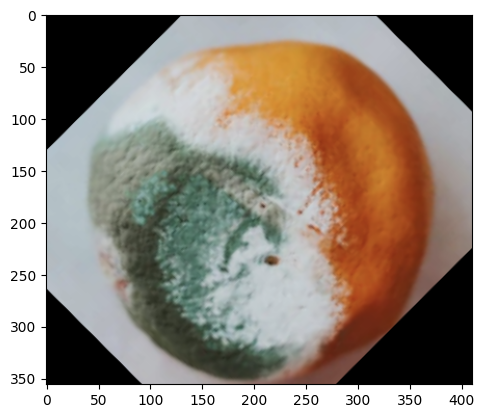

In [5]:
img = Image.open(df["images"][random.randint(0 , len(image_data) - 1)])
plt.imshow(img)
plt.show()

In [6]:
df["label"] = df["label"].astype("str")
df = df.sample(frac=1).reset_index(drop=True)
df

,images,label
0,images/stale_bitter_gourd/IMG_20200824_182241....,0
1,images/fresh_capsicum/IMG_20200825_144640.jpg_...,1
2,images/stale_banana/Screen Shot 2018-06-12 at ...,0
3,images/fresh_apple/rotated_by_30_Screen Shot 2...,1
4,images/stale_banana/saltandpepper_Screen Shot ...,0
...,...,...
14677,images/stale_orange/rotated_by_60_Screen Shot ...,0
14678,images/stale_capsicum/WhatsApp Image 2020-11-0...,0
14679,images/stale_tomato/Copy of IMG_20200730_17023...,0
14680,images/stale_apple/rotated_by_60_Screen Shot 2...,0


<Axes: xlabel='count', ylabel='label'>

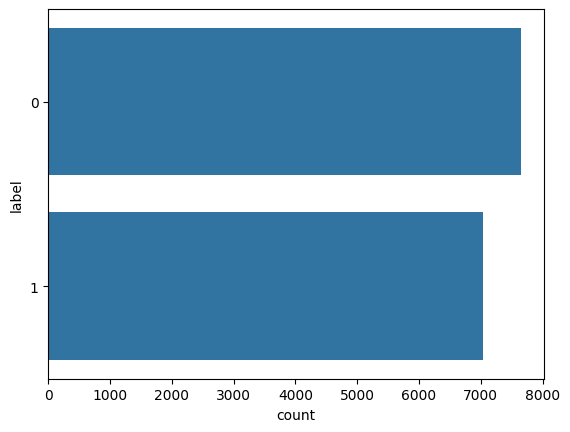

In [7]:
import seaborn as sns
sns.countplot(df["label"])

In [8]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df , test_size=0.25 , random_state=42)
train

,images,label
577,images/fresh_capsicum/capsicum3_0.jpg_0_4674.jpg,1
13647,images/stale_orange/vertical_flip_Screen Shot ...,0
10671,images/stale_orange/saltandpepper_Screen Shot ...,0
684,images/fresh_apple/rotated_by_75_Screen Shot 2...,1
10560,images/stale_capsicum/WhatsApp Image 2020-11-0...,0
...,...,...
5191,images/stale_banana/rotated_by_15_Screen Shot ...,0
13418,images/stale_apple/rotated_by_30_Screen Shot 2...,0
5390,images/fresh_orange/rotated_by_60_Screen Shot ...,1
860,images/fresh_banana/translation_Screen Shot 20...,1


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)
test_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col = "images",
    y_col = "label",
    target_size = (128 , 128),
    batch_size = 512,
    class_mode = "binary"
)
test_iterator = test_generator.flow_from_dataframe(
    test,
    x_col = "images",
    y_col = "label",
    target_size = (128 , 128),
    batch_size = 512,
    class_mode = "binary"
)

Found 11011 validated image filenames belonging to 2 classes.
Found 3671 validated image filenames belonging to 2 classes.


In [20]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPool2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(train_iterator, epochs=10, validation_data=test_iterator)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 218s 8s/step - accuracy: 0.4933 - loss: 1.1219 - val_accuracy: 0.5203 - val_loss: 0.6874
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 181s 7s/step - accuracy: 0.5565 - loss: 0.6786 - val_accuracy: 0.6314 - val_loss: 0.6305
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.6803 - loss: 0.5972 - val_accuracy: 0.7777 - val_loss: 0.4776
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.7554 - loss: 0.4978 - val_accuracy: 0.7472 - val_loss: 0.4722
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.7949 - loss: 0.4276 - val_accuracy: 0.8333 - val_loss: 0.3811
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8355 - loss: 0.3717 - val_accuracy: 0.8668 - val_loss: 0.3139
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8566 - loss: 0.3369 - val_accuracy: 0.8837 - val_loss: 0.2832
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8783 - loss: 0.2983 - val_accuracy: 0.8761 - v

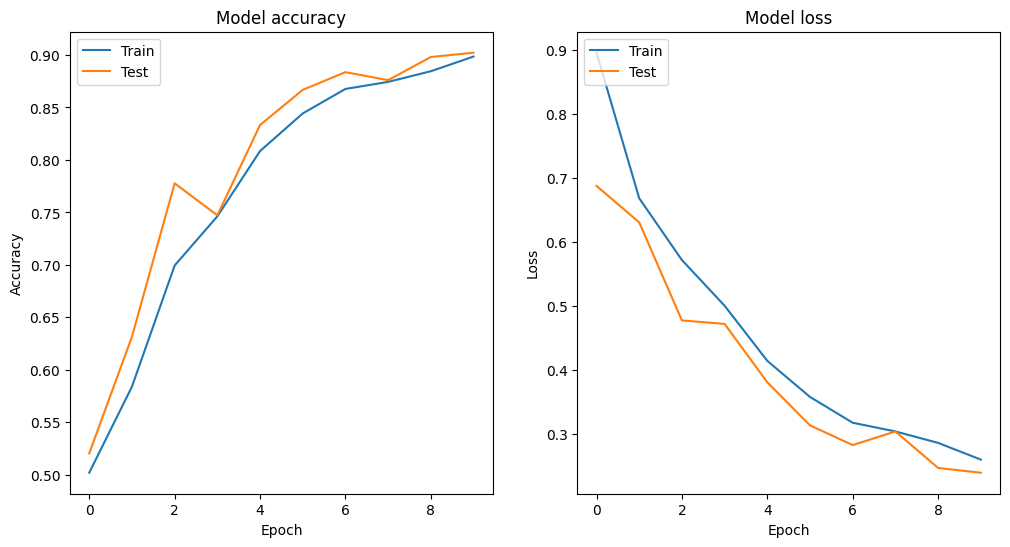

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
# from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()
# for batch in test_iterator:
#     x,y = batch
#     yhat = model.predict(x)
#     pre.update_state(y , yhat)
#     re.update_state(y , yhat)
#     acc.update_state(y , yhat)
# print("Precision : ", pre.result().numpy())
# print("Recall : ", re.result().numpy())
# print("Accuracy : ", acc.result().numpy())


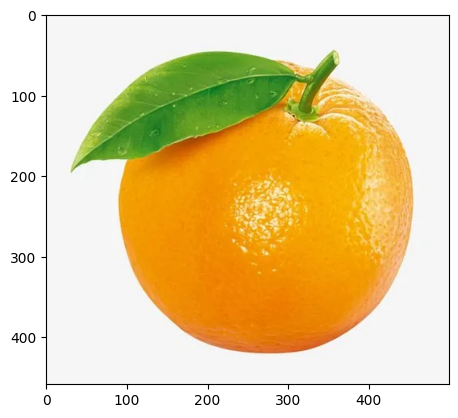

In [59]:
import cv2
img = cv2.imread("D:\\Pyhton\\ML\\Rotten fruits and vegetables detector\\testImage.webp")
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()

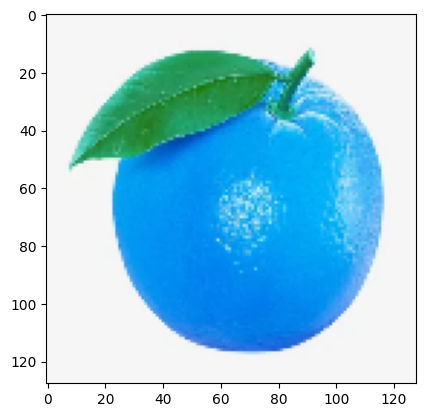

In [60]:
resize = tf.image.resize(img , (128 , 128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
np.expand_dims(resize , 0).shape

(1, 128, 128, 3)

In [62]:
yPred = model.predict(np.expand_dims(resize/128 , 0))
print(yPred)
if yPred > 0.5:
    print("This is fresh")
else:
    print("This is rotten")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.9098562]]
This is fresh


In [63]:
model.save("fruit_vegetable_rotten_detector.h5")